In [ ]:
#5.1와인 데이터셋 불러오기
import pandas as pd
red =pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-'
                'databases/wine-quality/winequality-red.csv',sep=';')
white =pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-'
                'databases/wine-quality/winequality-white.csv',sep=';')

In [4]:
print(red.head())
print(white.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [6]:
red['type']=0
white['type']=1
print(red.head(2))
print(white.head(2))
wine = pd.concat([red,white])
print(wine.describe())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70          0.0             1.9      0.076   
1            7.8              0.88          0.0             2.6      0.098   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   

   alcohol  quality  type  
0      9.4        5     0  
1      9.8        5     0  
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   

   free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  \
0                 45.0                 170.0    1.001  3.0       0.45   
1                 14.0                 132.0    0.994  3.3       0.49   

   

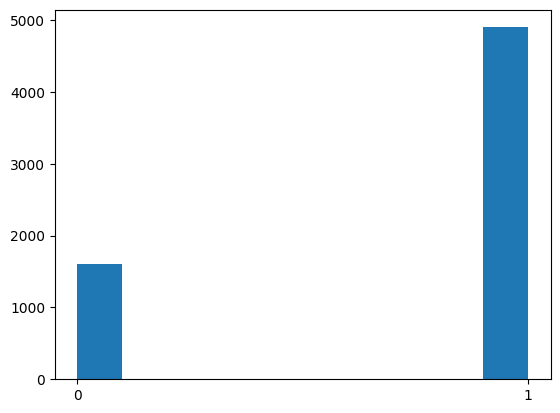

type
1    4898
0    1599
Name: count, dtype: int64


In [7]:
#5.3레드 완이과 화이트 와인 type 히스토그램
import matplotlib.pyplot as plt
plt.hist(wine['type'])
plt.xticks([0,1])
plt.show()
print(wine['type'].value_counts())

In [8]:
#5.4데이터 요약 정보 확인
print(wine.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB
None


In [9]:
#5.5 데이터 정규화
wine_norm = (wine-wine.min())/(wine.max()-wine.min())
print(wine_norm.head())
print(wine_norm.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.297521          0.413333     0.000000        0.019939   0.111296   
1       0.330579          0.533333     0.000000        0.030675   0.147841   
2       0.330579          0.453333     0.024096        0.026074   0.137874   
3       0.611570          0.133333     0.337349        0.019939   0.109635   
4       0.297521          0.413333     0.000000        0.019939   0.111296   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.034722              0.064516  0.206092  0.612403   0.191011   
1             0.083333              0.140553  0.186813  0.372093   0.258427   
2             0.048611              0.110599  0.190669  0.418605   0.241573   
3             0.055556              0.124424  0.209948  0.341085   0.202247   
4             0.034722              0.064516  0.206092  0.612403   0.191011   

    alcohol   quality  type  
0  0.202899  0.333333   0.

In [10]:
#5.6 데이터 섞은 후 numpy array로 변환
import numpy as np
wine_shuffle = wine_norm.sample(frac=1)
print(wine_shuffle.head())
wine_np = wine_shuffle.to_numpy()
print(wine_np[:5])

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1811       0.314050          0.200000     0.120482        0.042945   0.061462   
623        0.280992          0.106667     0.204819        0.007669   0.059801   
210        0.148760          0.110000     0.150602        0.139571   0.038206   
2309       0.355372          0.133333     0.204819        0.010736   0.043189   
172        0.314050          0.266667     0.222892        0.003067   0.046512   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
1811             0.027778              0.253456  0.140544  0.333333   
623              0.006944              0.133641  0.080779  0.395349   
210              0.038194              0.142857  0.132832  0.457364   
2309             0.034722              0.276498  0.100443  0.325581   
172              0.010417              0.216590  0.059572  0.240310   

      sulphates   alcohol   quality  type  
1811   0.106742  0.202899  0.333333   1.0 

In [34]:
#5.7 train 데이터와 test 데이터로 분리
import keras
train_idx =int(len(wine_np)*0.8)
train_X,train_Y = wine_np[:train_idx,:-1], wine_np[:train_idx,-1] #train_x는 마지막꺼 빼고 train_y는 마지막꺼
test_X,text_Y = wine_np[train_idx:,:-1],wine_np[train_idx:,-1]

In [36]:
print(train_X[0])
print(train_Y[0])
print(test_X[0])
print(text_Y[0])


[0.31404959 0.2        0.12048193 0.04294479 0.06146179 0.02777778
 0.25345622 0.14054367 0.33333333 0.10674157 0.20289855 0.33333333]
1.0
[0.27272727 0.06       0.24096386 0.21395706 0.06312292 0.15972222
 0.34562212 0.23790245 0.48062016 0.31460674 0.15942029 0.5       ]
1.0


In [15]:
train_Y = keras.utils.to_categorical(train_Y,num_classes=2)
test_Y = keras.utils.to_categorical(text_Y,num_classes=2)
print(train_Y[0])
print(test_Y[0])

[0. 1.]
[0. 1.]


In [23]:
#5.8 와인 데이터셋 분류 모델 생성
model = keras.Sequential([
    keras.layers.Dense(units=48,activation='relu',input_shape=(12,)),
    keras.layers.Dense(units=24,activation='relu'),
    keras.layers.Dense(units=12,activation='relu'),
    keras.layers.Dense(units=2,activation='softmax')
])
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.07),
              loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
#5.9와인 데이터셋 분류 모델 학습
history = model.fit(train_X,train_Y,epochs=25,batch_size=32,
                    validation_split=0.25)

Epoch 1/25
122/122 [==============================] - 1s 3ms/step - loss: 0.1349 - accuracy: 0.9564 - val_loss: 0.1019 - val_accuracy: 0.9646
Epoch 2/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0753 - accuracy: 0.9797 - val_loss: 0.2416 - val_accuracy: 0.8562
Epoch 3/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0688 - accuracy: 0.9792 - val_loss: 0.0417 - val_accuracy: 0.9854
Epoch 4/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0528 - accuracy: 0.9851 - val_loss: 0.0249 - val_accuracy: 0.9946
Epoch 5/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0434 - accuracy: 0.9892 - val_loss: 0.0223 - val_accuracy: 0.9954
Epoch 6/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0436 - accuracy: 0.9877 - val_loss: 0.0282 - val_accuracy: 0.9938
Epoch 7/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0605 - accuracy: 0.9846 - val_loss: 0.0475 - val_accuracy: 0.9862
Epoch 

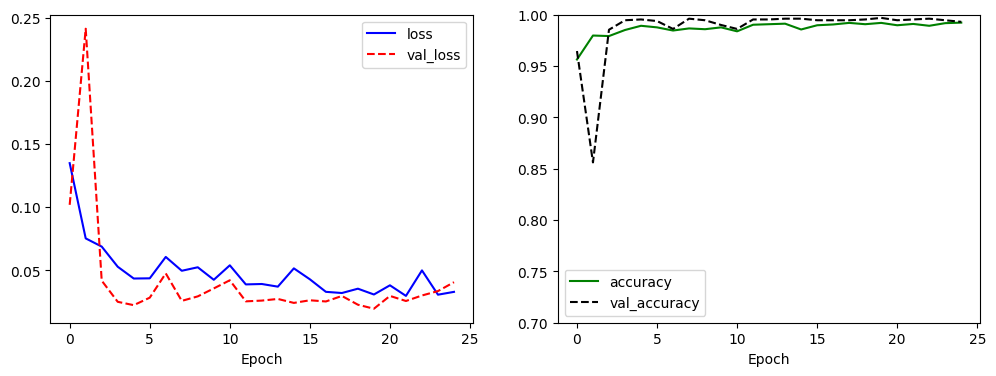

In [26]:
#5.10 분류 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-',label='loss')
plt.plot(history.history['val_loss'],'r--',label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'g-',label='accuracy')
plt.plot(history.history['val_accuracy'],'k--',label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7,1)
plt.legend()

plt.show()

In [37]:
#5.11 분류 모델 평가
model.evaluate(test_X,test_Y)

41/41 [==============================] - 0s 1ms/step - loss: 0.0466 - accuracy: 0.9915


[0.04657786339521408, 0.9915384650230408]

In [29]:
#다항분류

In [32]:
#5.12품질 데이터 확인
print(wine['quality'].describe())
print(wine['quality'].value_counts)


count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64
<bound method IndexOpsMixin.value_counts of 0       5
1       5
2       5
3       6
4       5
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 6497, dtype: int64>


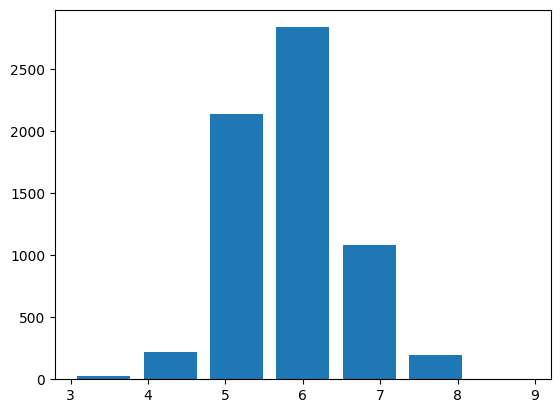

In [33]:
#5.13품질 히스토그램 시각화
import matplotlib.pyplot as plt
plt.hist(wine['quality'],bins=7,rwidth=0.8)
plt.show()

In [38]:
#5.14 품질을 3개의 범주(좋음, 보통, 나쁨)로 재분류
wine.loc[wine['quality']<=5,'new_quality'] = 0
wine.loc[wine['quality']==6,'new_quality'] = 1
wine.loc[wine['quality']>=7,'new_quality'] = 2


In [39]:
print(wine['new_quality'].describe())
print(wine['new_quality'].value_counts())


count    6497.000000
mean        0.829614
std         0.731124
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: new_quality, dtype: float64
new_quality
1.0    2836
0.0    2384
2.0    1277
Name: count, dtype: int64


In [40]:
#5.15데이터 정규화 및 train,test 데이터 분리
del wine['quality']
wine_backup = wine.copy()
wine_norm = (wine-wine.min())/(wine.max()-wine.min())
wine_norm['new_quality'] = wine_backup['new_quality']
wine_shuffle = wine_norm.sample(frac=1)
wine_np = wine_shuffle.to_numpy()

In [42]:
train_idx = int(len(wine_np)*0.8)
train_X,train_Y = wine_np[:train_idx,:-1], wine_np[:train_idx,-1] #train_x는 마지막꺼 빼고 train_y는 마지막꺼
test_X,text_Y = wine_np[train_idx:,:-1],wine_np[train_idx:,-1]
train_Y = keras.utils.to_categorical(train_Y,num_classes=3)
test_Y = keras.utils.to_categorical(test_Y,num_classes=3)


In [44]:
#5.16 와인 데이터셋 다항 분류 모델 생성 및 학습
model = keras.Sequential([
    keras.layers.Dense(units=48,activation='relu',input_shape=(12,)),
    keras.layers.Dense(units=24,activation='relu'),
    keras.layers.Dense(units=12,activation='relu'),
    keras.layers.Dense(units=3,activation='softmax')
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.003),
              loss='categorical_crossentropy',metrics=['accuracy'])


In [45]:
history = model.fit(train_X,train_Y,epochs=25,batch_size=32,validation_split=0.25)

Epoch 1/25
122/122 [==============================] - 1s 3ms/step - loss: 0.9734 - accuracy: 0.4827 - val_loss: 0.8982 - val_accuracy: 0.5423
Epoch 2/25
122/122 [==============================] - 0s 2ms/step - loss: 0.8914 - accuracy: 0.5527 - val_loss: 0.8713 - val_accuracy: 0.5592
Epoch 3/25
122/122 [==============================] - 0s 2ms/step - loss: 0.8712 - accuracy: 0.5663 - val_loss: 0.8733 - val_accuracy: 0.5515
Epoch 4/25
122/122 [==============================] - 0s 2ms/step - loss: 0.8679 - accuracy: 0.5692 - val_loss: 0.8682 - val_accuracy: 0.5623
Epoch 5/25
122/122 [==============================] - 0s 2ms/step - loss: 0.8649 - accuracy: 0.5704 - val_loss: 0.8715 - val_accuracy: 0.5785
Epoch 6/25
122/122 [==============================] - 0s 2ms/step - loss: 0.8542 - accuracy: 0.5812 - val_loss: 0.8595 - val_accuracy: 0.5838
Epoch 7/25
122/122 [==============================] - 0s 2ms/step - loss: 0.8539 - accuracy: 0.5799 - val_loss: 0.8557 - val_accuracy: 0.5877
Epoch 